In [2]:
import sqlite3

In [3]:
cx = sqlite3.connect('my_metrics.db')
cur = cx.cursor()


In [4]:
cur.execute('SELECT name FROM sqlite_master')
cur.fetchall()

[(u'tmp',),
 (u'tmp2',),
 (u'metrics',),
 (u'sqlite_sequence',),
 (u'metrics_N_20',),
 (u'metrics_N_20__iter_4__batch_words_1',),
 (u'metrics_N_20__iter_4__batch_words_10000',),
 (u'metrics_N_20__iter_4__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_5__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_10__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_20__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_40__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_80__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_60__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_30__batch_words_10000__da_1M',),
 (u'metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'ttratio_tiratio__metrics_N_20__iter_35__batch_words_10000__da_1M',),
 (u'metrics__normalized_user_repr__N_20__iter_35__batch_words_10000__da_1M',)]

In [5]:
cur.execute("SELECT max(f1) FROM metrics_N_20;")
ret = cur.fetchall()
print ret

[(0.14273766378589353,)]


In [15]:
N = 20
para_iter = 30
batch_words = 10000
data_set = '1M'
#table_name_prefix = 'metrics_N_%d__iter_%d__batch_words_%d__da_%s'
table_name_prefix = 'metrics__normalized_user_repr__N_%d__iter_%d__batch_words_%d__da_%s'



table_name = table_name_prefix % (N, para_iter, batch_words, data_set)
cur.execute("SELECT max(f1) FROM %s;" % table_name)
ret = cur.fetchall()
print ret

[(0.08698679693832587,)]


In [10]:
print table_name

metrics_N_20__iter_4__batch_words_10000__da_1M


In [4]:
ret

[(0.08331641180237734,)]

In [18]:
cur.execute("SELECT count(*) from %s;" % table_name)
ret = cur.fetchall()
print ret

[(131,)]


In [116]:
cur.execute("SELECT * from %s;" % table_name)
ret = cur.fetchall()

for i, x in enumerate(ret):
    print x
    if (10 == i):
        break
    

(1, 480, 1, 4, 0.12246808510638298, 0.07102490066878903, 0.08990799893784852, u'2017-02-19 14:49:25')
(2, 480, 1, 4, 0.12136170212765958, 0.07038325806372005, 0.08909576545196107, u'2017-02-19 14:53:31')
(3, 480, 1, 4, 0.12238297872340426, 0.07097554354532218, 0.0898455194389341, u'2017-02-19 14:57:41')
(4, 100, 1, 2, 0.12051063829787234, 0.0698896868290516, 0.08847097046281689, u'2017-02-19 17:00:31')
(5, 140, 1, 2, 0.1211063829787234, 0.07023518669331952, 0.08890832695521783, u'2017-02-19 17:01:11')
(6, 180, 1, 2, 0.12280851063829787, 0.0712223291626564, 0.0901579169335062, u'2017-02-19 17:01:54')
(7, 220, 1, 2, 0.12217021276595745, 0.07085215073665507, 0.08968932069164806, u'2017-02-19 17:02:40')
(8, 260, 1, 2, 0.12242553191489362, 0.0710002221070556, 0.0898767591883913, u'2017-02-19 17:03:29')
(9, 300, 1, 2, 0.12268085106382978, 0.07114829347745613, 0.09006419768513456, u'2017-02-19 17:04:21')
(10, 340, 1, 2, 0.12046808510638297, 0.06986500826731817, 0.08843973071335967, u'2017-02-

In [11]:
cur.execute("SELECT * from %s order by f1 desc;" % table_name)
ret = cur.fetchall()

In [12]:
for x in ret[:40]:
    print x

(199, 420, 5, 1, 0.33745833333333336, 0.05067544315202633, 0.08811833250825532, u'2017-02-22 13:48:43')
(6, 130, 1, 1, 0.33691666666666664, 0.050594102151782304, 0.08797689056201413, u'2017-02-22 11:22:08')
(72, 380, 2, 1, 0.336875, 0.05058784515176354, 0.08796601041230327, u'2017-02-22 12:11:26')
(157, 410, 4, 1, 0.3365, 0.050531532151594595, 0.08786808906490554, u'2017-02-22 13:16:36')
(78, 440, 2, 1, 0.33641666666666664, 0.05051901815155706, 0.08784632876548382, u'2017-02-22 12:16:50')
(40, 470, 1, 1, 0.33620833333333333, 0.050487733151463196, 0.0877919280169295, u'2017-02-22 11:48:19')
(39, 460, 1, 1, 0.33608333333333335, 0.050468962151406886, 0.08775928756779694, u'2017-02-22 11:47:21')
(183, 260, 5, 1, 0.33608333333333335, 0.050468962151406886, 0.08775928756779694, u'2017-02-22 13:35:43')
(43, 500, 1, 1, 0.3360416666666667, 0.050462705151388114, 0.08774840741808607, u'2017-02-22 11:51:18')
(70, 360, 2, 1, 0.336, 0.05045644815136934, 0.08773752726837522, u'2017-02-22 12:09:44')
(2

In [26]:
ret_1_3 = filter(lambda x: x[2] == 1 and x[3] == 3, ret)

In [27]:
for x in ret_1_3:
    print x

(62, 220, 1, 3, 0.12374468085106383, 0.07176525752079169, 0.0908451914215648, u'2017-02-19 17:51:00')
(61, 180, 1, 3, 0.12336170212765958, 0.07154315046519089, 0.09056403367644993, u'2017-02-19 17:50:12')
(66, 380, 1, 3, 0.12302127659574467, 0.07134572197132351, 0.09031411568079224, u'2017-02-19 17:54:53')
(60, 140, 1, 3, 0.12293617021276596, 0.07129636484785666, 0.09025163618187783, u'2017-02-19 17:49:27')
(63, 260, 1, 3, 0.1228936170212766, 0.07127168628612325, 0.09022039643242062, u'2017-02-19 17:51:52')
(67, 420, 1, 3, 0.12280851063829787, 0.0712223291626564, 0.0901579169335062, u'2017-02-19 17:56:01')
(69, 500, 1, 3, 0.12268085106382978, 0.07114829347745613, 0.09006419768513456, u'2017-02-19 17:58:28')
(59, 100, 1, 3, 0.12259574468085106, 0.07109893635398928, 0.09000171818622013, u'2017-02-19 17:48:46')
(68, 460, 1, 3, 0.12242553191489362, 0.0710002221070556, 0.0898767591883913, u'2017-02-19 17:57:13')
(65, 340, 1, 3, 0.12212765957446808, 0.07082747217492165, 0.08965808094219084, 

In [28]:
ret_1_2 = filter(lambda x: x[2] == 1 and x[3] == 2, ret)
for x in ret_1_2:
    print x

(6, 180, 1, 2, 0.12280851063829787, 0.0712223291626564, 0.0901579169335062, u'2017-02-19 17:01:54')
(12, 420, 1, 2, 0.12276595744680852, 0.07119765060092298, 0.09012667718404899, u'2017-02-19 17:07:19')
(9, 300, 1, 2, 0.12268085106382978, 0.07114829347745613, 0.09006419768513456, u'2017-02-19 17:04:21')
(8, 260, 1, 2, 0.12242553191489362, 0.0710002221070556, 0.0898767591883913, u'2017-02-19 17:03:29')
(7, 220, 1, 2, 0.12217021276595745, 0.07085215073665507, 0.08968932069164806, u'2017-02-19 17:02:40')
(14, 500, 1, 2, 0.12187234042553191, 0.0706794008045211, 0.08947064244544758, u'2017-02-19 17:09:36')
(13, 460, 1, 2, 0.1216595744680851, 0.070556007995854, 0.08931444369816154, u'2017-02-19 17:08:26')
(11, 380, 1, 2, 0.12161702127659574, 0.07053132943412058, 0.08928320394870433, u'2017-02-19 17:06:17')
(5, 140, 1, 2, 0.1211063829787234, 0.07023518669331952, 0.08890832695521783, u'2017-02-19 17:01:11')
(4, 100, 1, 2, 0.12051063829787234, 0.0698896868290516, 0.08847097046281689, u'2017-02-

In [56]:
mc_w_comb = []
for x in ret:
    mc_w_comb.append((x[2], x[3]))
mc_w_comb = list(set(mc_w_comb))
print mc_w_comb

[(1, 2), (5, 4), (1, 3), (3, 3), (3, 4), (4, 4), (3, 2), (1, 4), (2, 3), (4, 3), (2, 2), (4, 2), (5, 2), (2, 4), (5, 3)]


In [57]:
mc_w_freq = { comb: len(filter(lambda x: x[2] == comb[0] and x[3] == comb[1], ret)) for comb in mc_w_comb }
print mc_w_freq

{(1, 2): 22, (5, 4): 11, (1, 3): 11, (3, 3): 11, (5, 2): 11, (4, 4): 11, (3, 2): 11, (1, 4): 14, (2, 3): 11, (4, 3): 11, (2, 2): 18, (4, 2): 11, (3, 4): 11, (2, 4): 11, (5, 3): 11}


In [58]:
f1_larger_than_009_dict = { comb: len(filter(lambda x: x[2] == comb[0] and x[3] == comb[1] and x[6] > 0.09, ret)) 
                           for comb in mc_w_comb
                          }
print f1_larger_than_009_dict

{(1, 2): 4, (5, 4): 1, (1, 3): 8, (3, 3): 5, (5, 2): 0, (4, 4): 1, (3, 2): 0, (1, 4): 1, (2, 3): 4, (4, 3): 2, (2, 2): 0, (4, 2): 0, (3, 4): 0, (2, 4): 0, (5, 3): 1}


In [114]:
dist = [[comb, mc_w_freq[comb], f1_larger_than_009_dict[comb], 
         f1_larger_than_009_dict[comb] * 1. / mc_w_freq[comb]] 
        for comb in mc_w_comb]
dist.sort(key=lambda x: -1 * x[-1])
for x in dist:
    print x
    
most_promising_mc_w_comb = dist[0][0]
print 'most_promising_mc_w_comb:', most_promising_mc_w_comb
# So, it seems that, min_count == 1 and window == 3 is the most promising combination

[(1, 3), 11, 8, 0.7272727272727273]
[(3, 3), 11, 5, 0.45454545454545453]
[(2, 3), 11, 4, 0.36363636363636365]
[(1, 2), 22, 4, 0.18181818181818182]
[(4, 3), 11, 2, 0.18181818181818182]
[(5, 4), 11, 1, 0.09090909090909091]
[(4, 4), 11, 1, 0.09090909090909091]
[(5, 3), 11, 1, 0.09090909090909091]
[(1, 4), 14, 1, 0.07142857142857142]
[(3, 4), 11, 0, 0.0]
[(3, 2), 11, 0, 0.0]
[(2, 2), 18, 0, 0.0]
[(4, 2), 11, 0, 0.0]
[(5, 2), 11, 0, 0.0]
[(2, 4), 11, 0, 0.0]
most_promising_mc_w_comb: (1, 3)


In [117]:


dist_under_most_promissing_mc_w_comb = filter(lambda x: x[2] == most_promising_mc_w_comb[0] and x[3] == most_promising_mc_w_comb[1],
                                             ret)
dist_under_most_promissing_mc_w_comb.sort(key=lambda x: x[1])
for x in dist_under_most_promissing_mc_w_comb:
    print dist_under_most_promissing_mc_w_comb

[(59, 100, 1, 3, 0.12259574468085106, 0.07109893635398928, 0.09000171818622013, u'2017-02-19 17:48:46'), (211, 100, 1, 3, 0.12187234042553191, 0.0706794008045211, 0.08947064244544758, u'2017-02-19 20:37:43'), (252, 100, 1, 3, 0.1214468085106383, 0.0704326151871869, 0.0891582449508755, u'2017-02-19 21:15:30'), (293, 100, 1, 3, 0.12225531914893617, 0.0709015078601219, 0.08975180019056246, u'2017-02-19 21:54:11'), (212, 110, 1, 3, 0.12195744680851064, 0.07072875792798795, 0.089533121944362, u'2017-02-19 20:38:21'), (253, 110, 1, 3, 0.12212765957446808, 0.07082747217492165, 0.08965808094219084, u'2017-02-19 21:16:10'), (294, 110, 1, 3, 0.12187234042553191, 0.0706794008045211, 0.08947064244544758, u'2017-02-19 21:54:50'), (213, 120, 1, 3, 0.12374468085106383, 0.07176525752079169, 0.0908451914215648, u'2017-02-19 20:39:00'), (254, 120, 1, 3, 0.12208510638297872, 0.07080279361318823, 0.08962684119273363, u'2017-02-19 21:16:50'), (295, 120, 1, 3, 0.12246808510638298, 0.07102490066878903, 0.089

In [127]:
import collections as coll

size_unique_value_list = list(set([x[1] for x in dist_under_most_promissing_mc_w_comb]))
size_unique_value_list.sort() # order it
print size_unique_value_list 

avg_f1_for_each_size = coll.defaultdict(list)
for r in dist_under_most_promissing_mc_w_comb:
    avg_f1_for_each_size[r[1]].append(r[6])
    
for size in size_unique_value_list:
    avg_f1_for_each_size[size] = sum(avg_f1_for_each_size[size]) * 1. / len(avg_f1_for_each_size[size])
    
for size in size_unique_value_list:
    print size, ':', avg_f1_for_each_size[size]
    


 [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
100 : 0.0895956014433
110 : 0.089553948444
120 : 0.090126677184
130 : 0.0899184121877
140 : 0.0902828759313
150 : 0.0901995699328
160 : 0.0900329579357
170 : 0.0903453554302
180 : 0.09079052186
190 : 0.0905015541775
200 : 0.0906681661746
210 : 0.0901683301833
220 : 0.0906343231127
230 : 0.0900850241848
240 : 0.0903765951797
250 : 0.0897622134404
260 : 0.0899782883741
270 : 0.0900017181862
280 : 0.0904078349292
290 : 0.0899600651869
300 : 0.0900537844353
310 : 0.0900329579357
320 : 0.0900329579357
330 : 0.0900329579357
340 : 0.0902099831826
350 : 0.0903765951797
360 : 0.090532793927
370 : 0.0899236188126
380 : 0.0902516361819
390 : 0.0900954374346
400 : 0.0900798175599
410 : 0.0904234548039
420 : 0.0898767591884
430 : 0.0895331219444
440 : 0.0896580809422
450 : 0.0897674200653
460 : 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:

dist_by_window = [avg_f1_for_each_size[x] for x in size_unique_value_list]
print dist_by_window


[0.08959560144327641, 0.08955394844400015, 0.09012667718404899, 0.08991841218766759, 0.09028287593133504, 0.09019956993278248, 0.09003295793567734, 0.09034535543024945, 0.0907905218600147, 0.09050155417753551, 0.09066816617464062, 0.09016833018332526, 0.09063432311272863, 0.0900850241847727, 0.09037659517970666, 0.08976221344038154, 0.08997828837412725, 0.09000171818622016, 0.09040783492916386, 0.08996006518694388, 0.09005378443531549, 0.09003295793567737, 0.09003295793567735, 0.09003295793567737, 0.09020998318260154, 0.09037659517970666, 0.0905327939269927, 0.08992361881257713, 0.09025163618187781, 0.09009543743459178, 0.09007981755986316, 0.09042345480389248, 0.08987675918839132, 0.089533121944362, 0.08965808094219084, 0.08976742006529108, 0.08997047843676292, 0.08995485856203433, 0.0898455194389341, 0.09009543743459178, 0.09000171818622014]


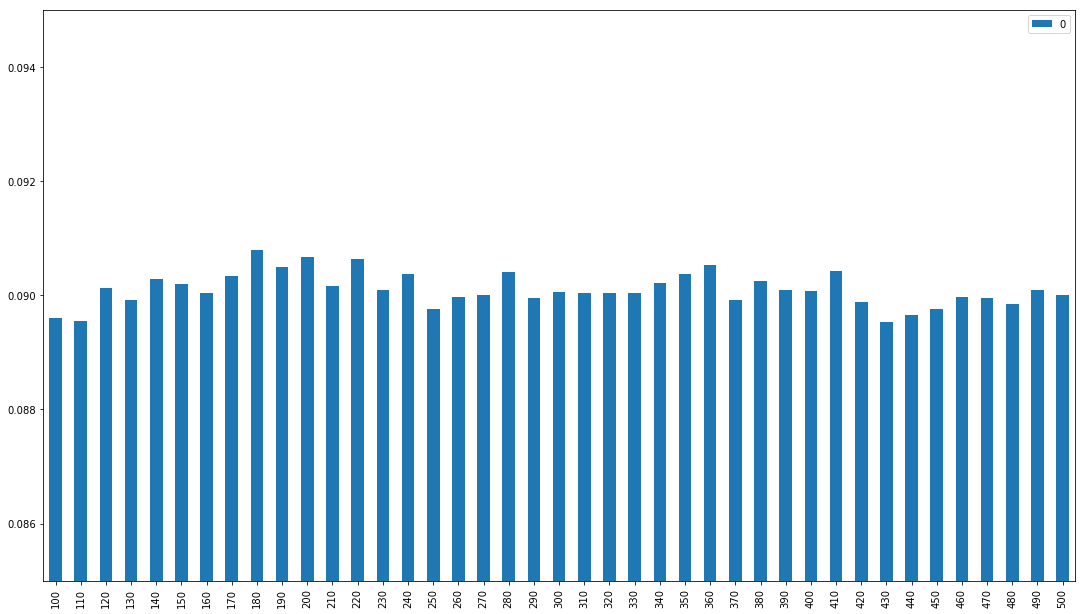

In [130]:
df = pd.DataFrame(dist_by_window, index=[size_unique_value_list])
r = df.plot(kind = 'bar', ylim=(0.085, 0.095))

#dir(r)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()


In [80]:
dir(df.plot)

['__bytes__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_constructor',
 '_dir_additions',
 '_dir_deletions',
 '_reset_cache',
 'area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']